### Description : This notebook includes the step wise workflow of the project invoice automation.Also I have used Opencv,numpy,matplotlib,pytesseract and Pillow libraries in this code.

### Date : 13/1/2021

### Author : Riya Chougule

### Steps : 
#### 1.Taking sample invoice image(RGB) as input
#### 2. Use the input image to get a binarized image
#### 3. Then, use the binarized image as input for contour detection(pixels of same intensity) and obtained the coordinates for each contour.
#### 4.Extract rectangle shaped contours with the help of coordinates from the contour values, and display them individually.
#### 5.Identify the related rectangles by observing similar range of height and width accordingly
#### 6.Apply OCR for characters and hence for words on the rectangular contours detected.
#### 7. Representation of the required information in master detail table format

### The implementation is as follows :

### 1.Taking sample invoice image(RGB) as input

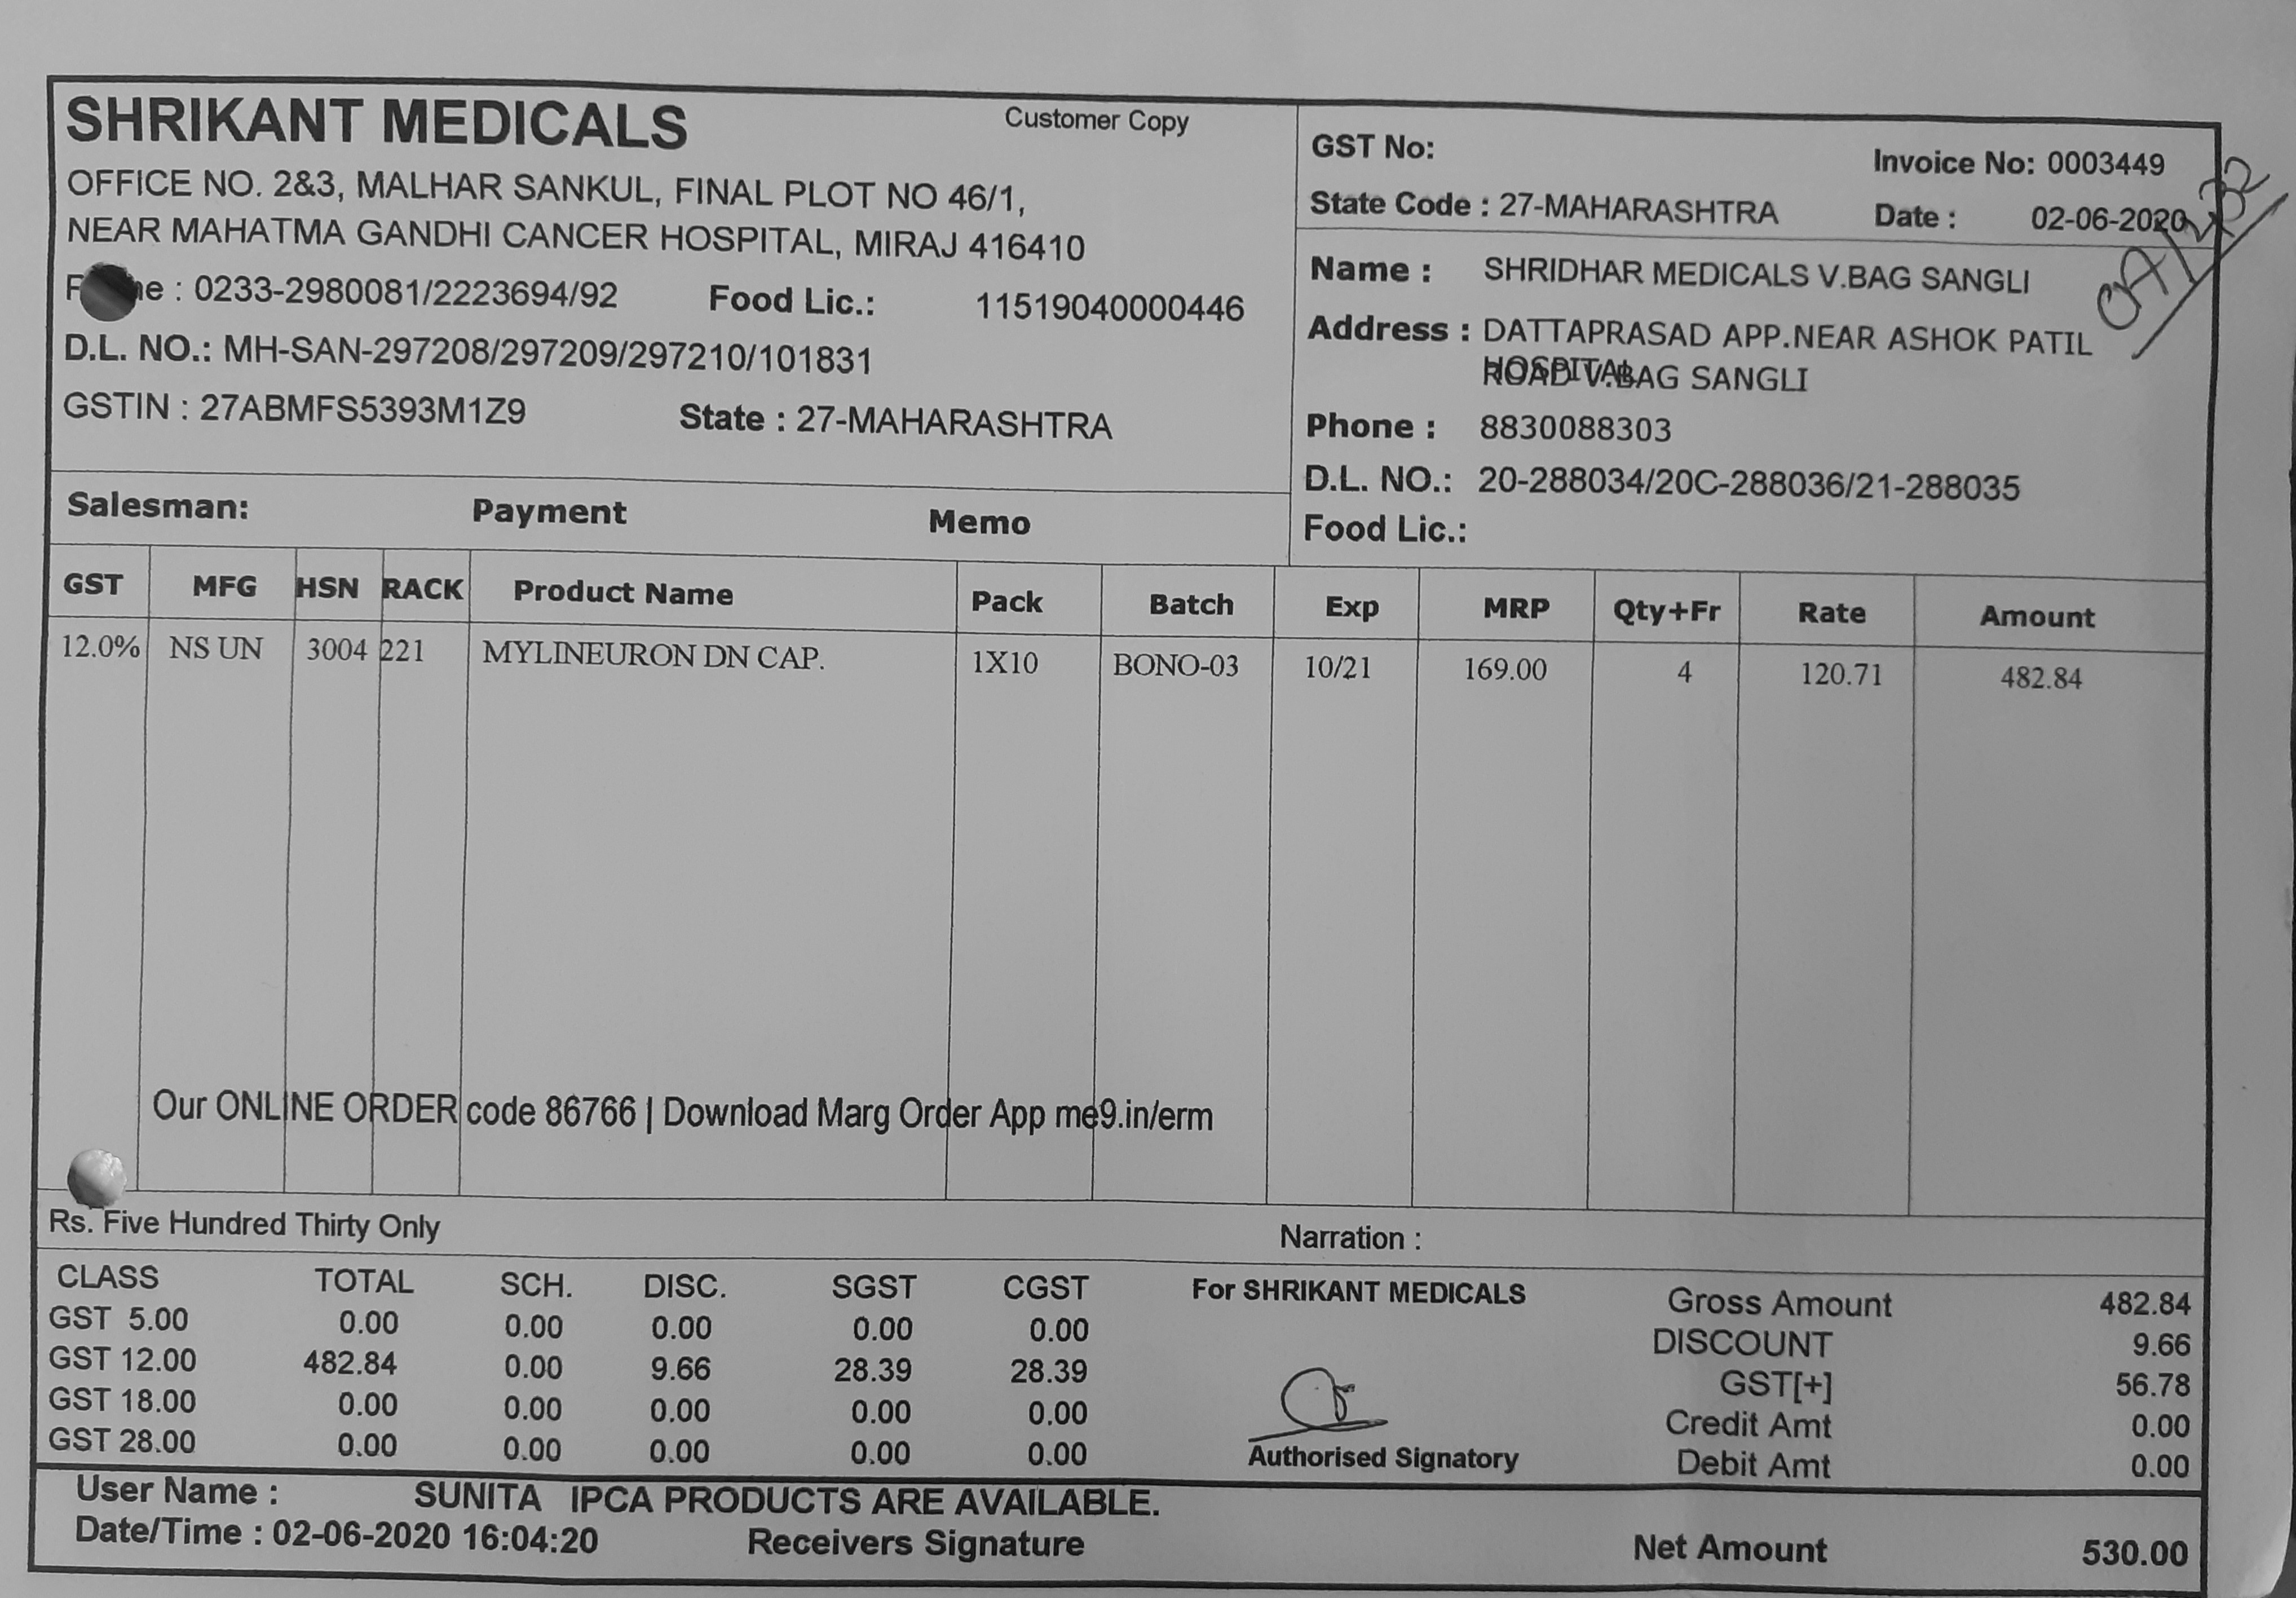

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
image = cv2.imread('inv10.jpg',0)
ret,thresh1 = cv2.threshold(image,110,255,cv2.THRESH_BINARY)
original1 = Image.fromarray(image)
original1

### 2. Use the input image to get the binarized image

In [2]:
img1 = Image.fromarray(thresh1)
img1

### 3. Then, use the binarized image as input for contour detection(pixels of same intensity) and obtained the coordinates for each contour.

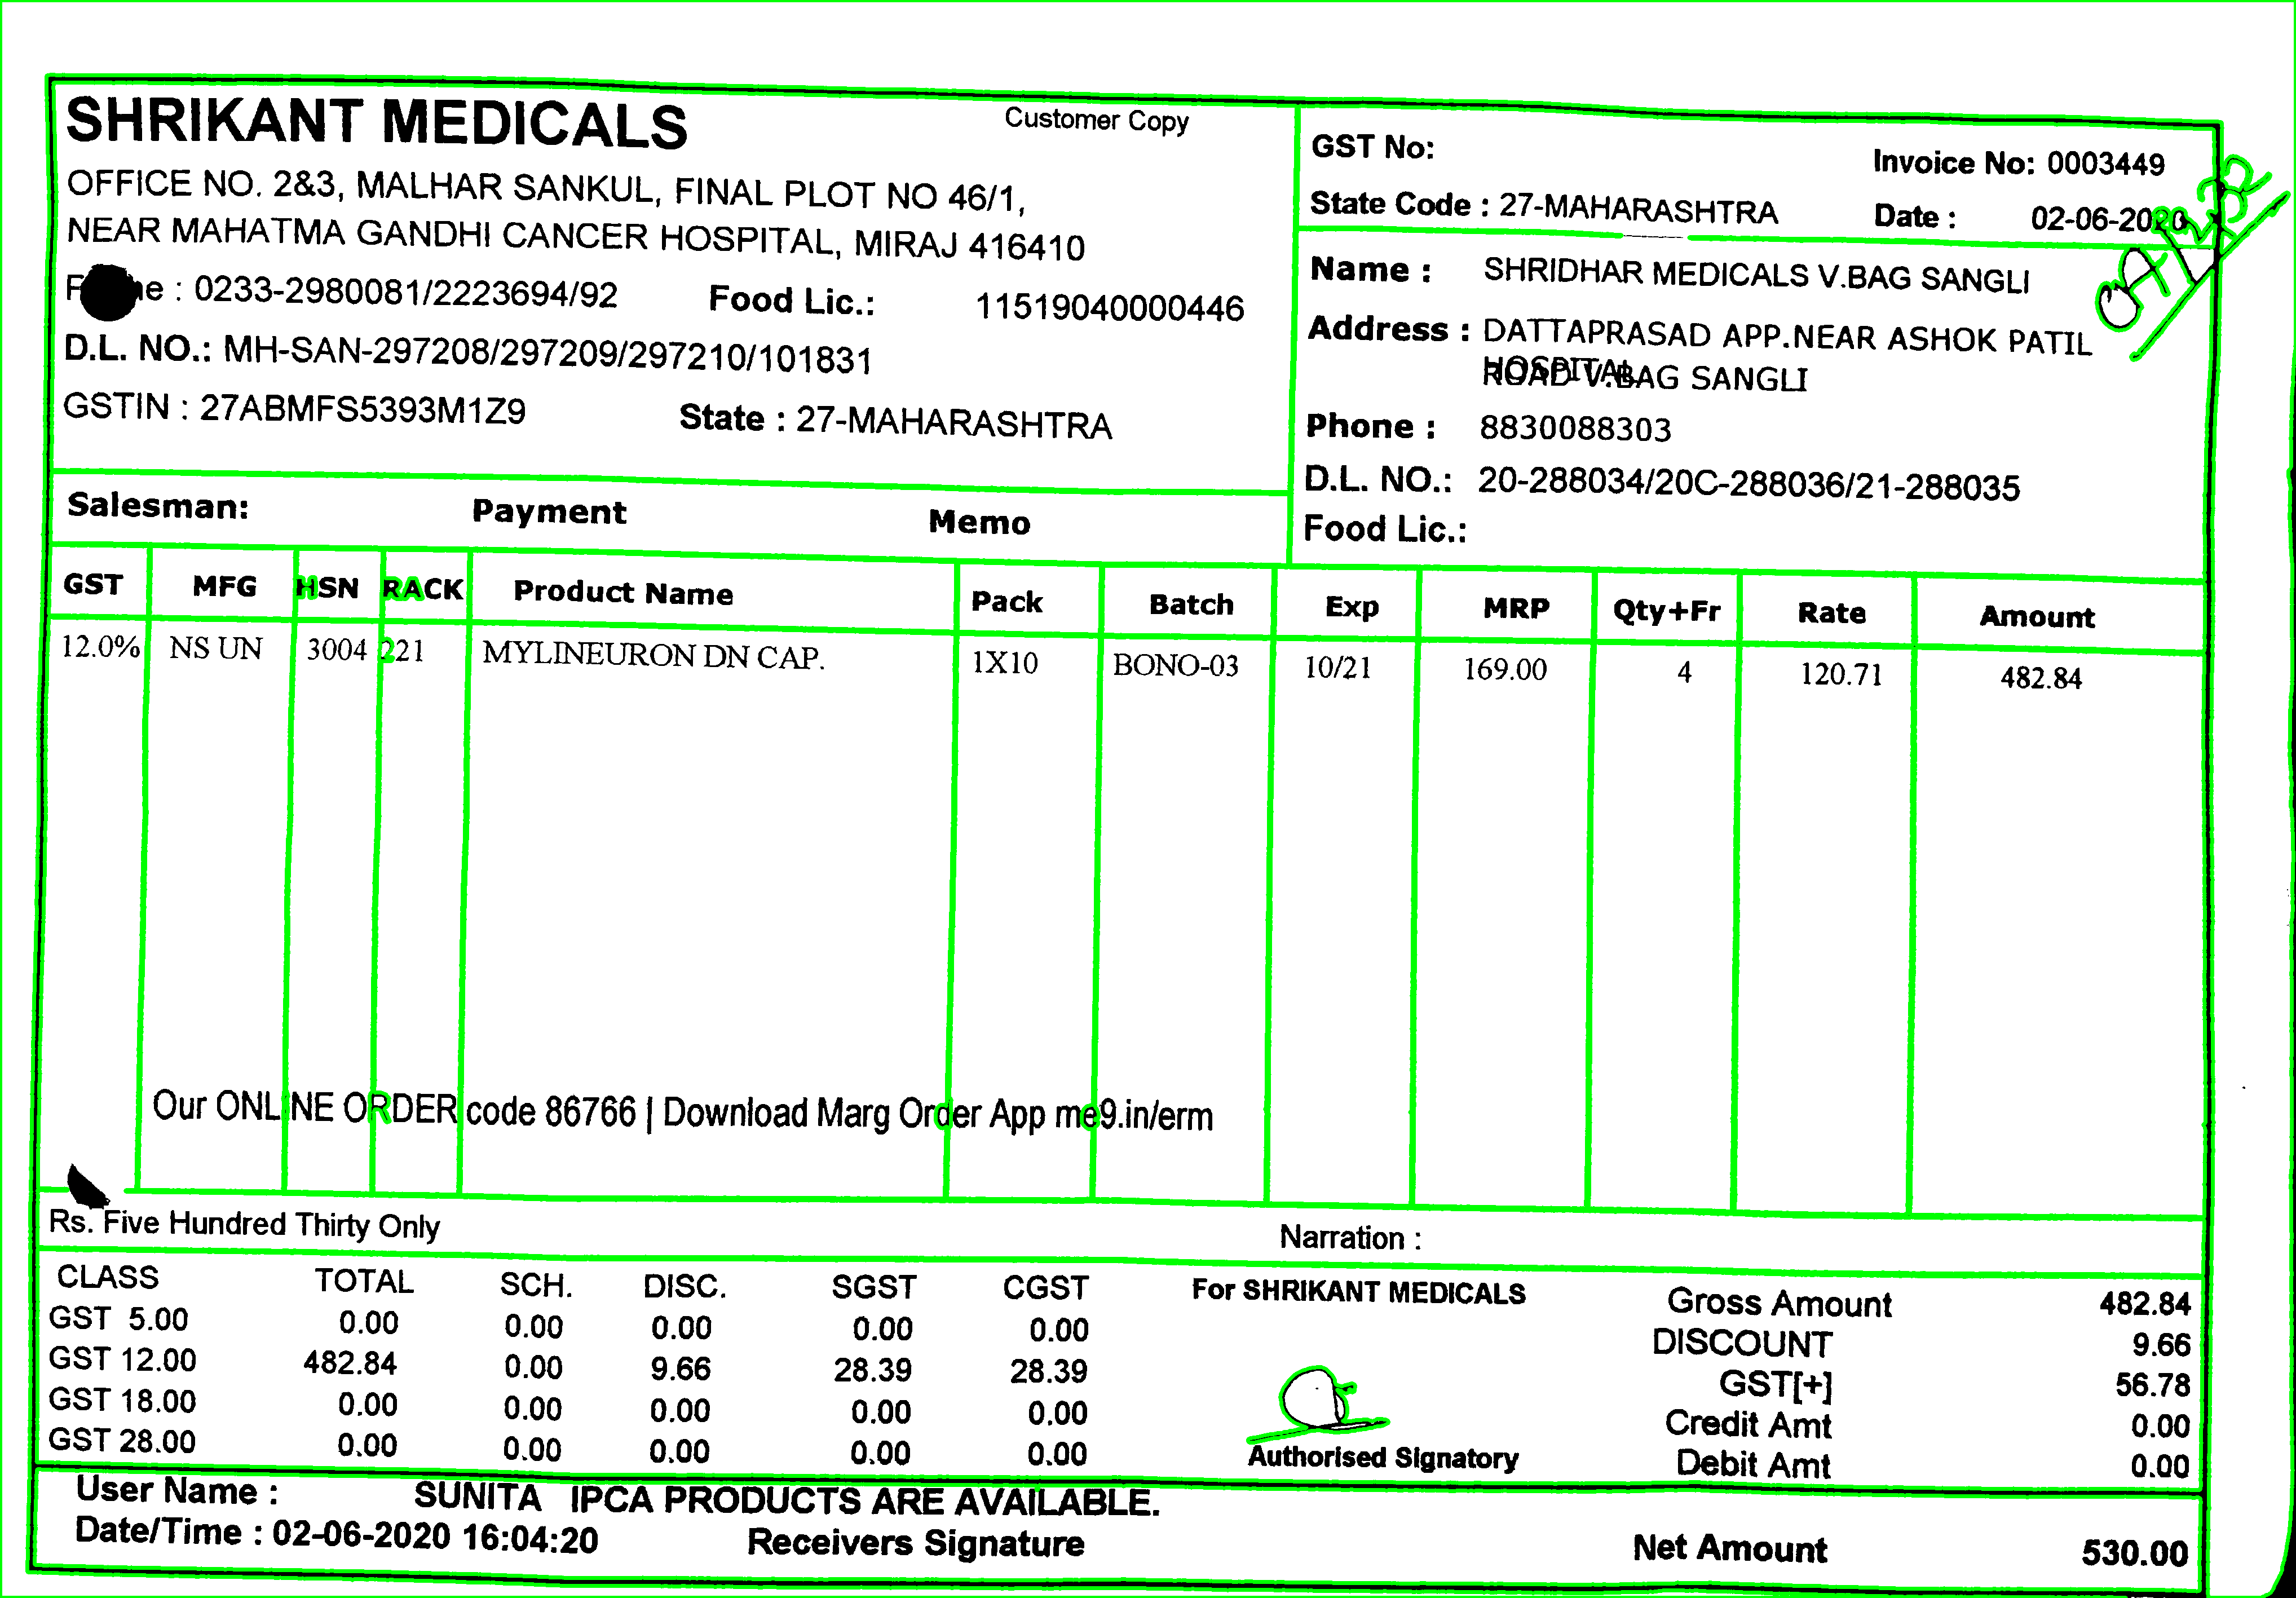

In [3]:
img1=cv2.imread("inv10_binary.png")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)
# Find contours
_,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea,reverse=True) 
# Select long perimeters only
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(30) if perimeters[i]>perimeters[0]/50]
numcards=len(listindex)
# Show image
imgcont = img1.copy()

cnt=[cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
cont=Image.fromarray(imgcont)
cont

### 4.Extract rectangle shaped contours with the help of coordinates from the contour values, and display them individually.

#### For this task, first I've listed all the contour coordinates.

In [4]:
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    print(x,"        ",y,"        ",w,"        ",h)

90          146          2210          728
64          2215          3844          428
0          0          4072          2834
2288          187          1643          843
816          1105          879          1021
61          2605          3843          218
66          1094          3844          1169
1679          1123          578          1011
3387          1148          526          1011
3076          1143          318          1012
2506          1135          319          1009
89          837          2198          166
245          1097          277          1017
2817          1139          266          1010
2248          1132          266          1007
505          1100          171          1017
661          1103          170          1016
834          976          862          145
3396          1021          516          136
2517          1008          310          129
3086          1016          308          129
1954          1002          305          128
265          968

In [5]:
h, w, c = img1.shape
print(w,h)

4072 2834


### 4.Extract rectangle shaped contours with the help of coordinates from the contour values, and display them individually.

#### Then we've shortlisted just the rectangular coordinates

In [6]:
W=4072
H=2834
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    if ((x+w)<=W) and ((y+h)<=H) and w>=150 and h>=120:
        try:
            print(x,"         ",y,"         ",w,"        ",h)
            cont1 = cont.crop((x,y,x+w,y+h))
            #cont1.show()                  # It shows the cropped rectangles(contours)
        except:
            print("An exception occurred")
            #print(x,y,w,h)
    #else:
     #   print (x,y, ": Irrelevant coordinates")

90           146           2210          728
64           2215           3844          428
0           0           4072          2834
2288           187           1643          843
816           1105           879          1021
61           2605           3843          218
66           1094           3844          1169
1679           1123           578          1011
3387           1148           526          1011
3076           1143           318          1012
2506           1135           319          1009
89           837           2198          166
245           1097           277          1017
2817           1139           266          1010
2248           1132           266          1007
505           1100           171          1017
661           1103           170          1016
834           976           862          145
3396           1021           516          136
2517           1008           310          129
3086           1016           308          129
1954           1002

#### Then, create a range of rectangles/contours with similar heights

In [12]:
W=4072
H=2834
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    if x>=0 and y>=0 and ((x+w)<=W) and ((y+h)<=H) and w>=150 and 2000>h>=1000:
        try:
            print(x,"         ",y,"         ",w,"        ",h)
            cont1 = cont.crop((x,y,x+w,y+h))
            #cont1.show()                  # It shows the cropped rectangles(contours)
        except:
            print("An exception occurred")
            #print(x,y,w,h)

816           1105           879          1021
66           1094           3844          1169
1679           1123           578          1011
3387           1148           526          1011
3076           1143           318          1012
2506           1135           319          1009
245           1097           277          1017
2817           1139           266          1010
2248           1132           266          1007
505           1100           171          1017
661           1103           170          1016


In [13]:
W=4072
H=2834
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    if x>=0 and y>=0 and ((x+w)<=W) and ((y+h)<=H) and w>=150 and 150>h>=120 and w!=250:
        try:
            print(x,"         ",y,"         ",w,"        ",h)
            cont1 = cont.crop((x,y,x+w,y+h))
            cont1.show()                  # It shows the cropped rectangles(contours)
        except:
            print("An exception occurred")
            #print(x,y,w,h)

834           976           862          145
3396           1021           516          136
2517           1008           310          129
3086           1016           308          129
1954           1002           305          128
265           968           260          130
2828           1012           257          128
2260           1005           256          128
1698           996           255          130
86           965           179          129
524           973           156          127
679           974           154          128


###  5.Identify the related rectangles by observing similar range of height and width accordingly

#### -- To do --

### 6.Apply OCR for characters and hence for words on the rectangular contours detected.

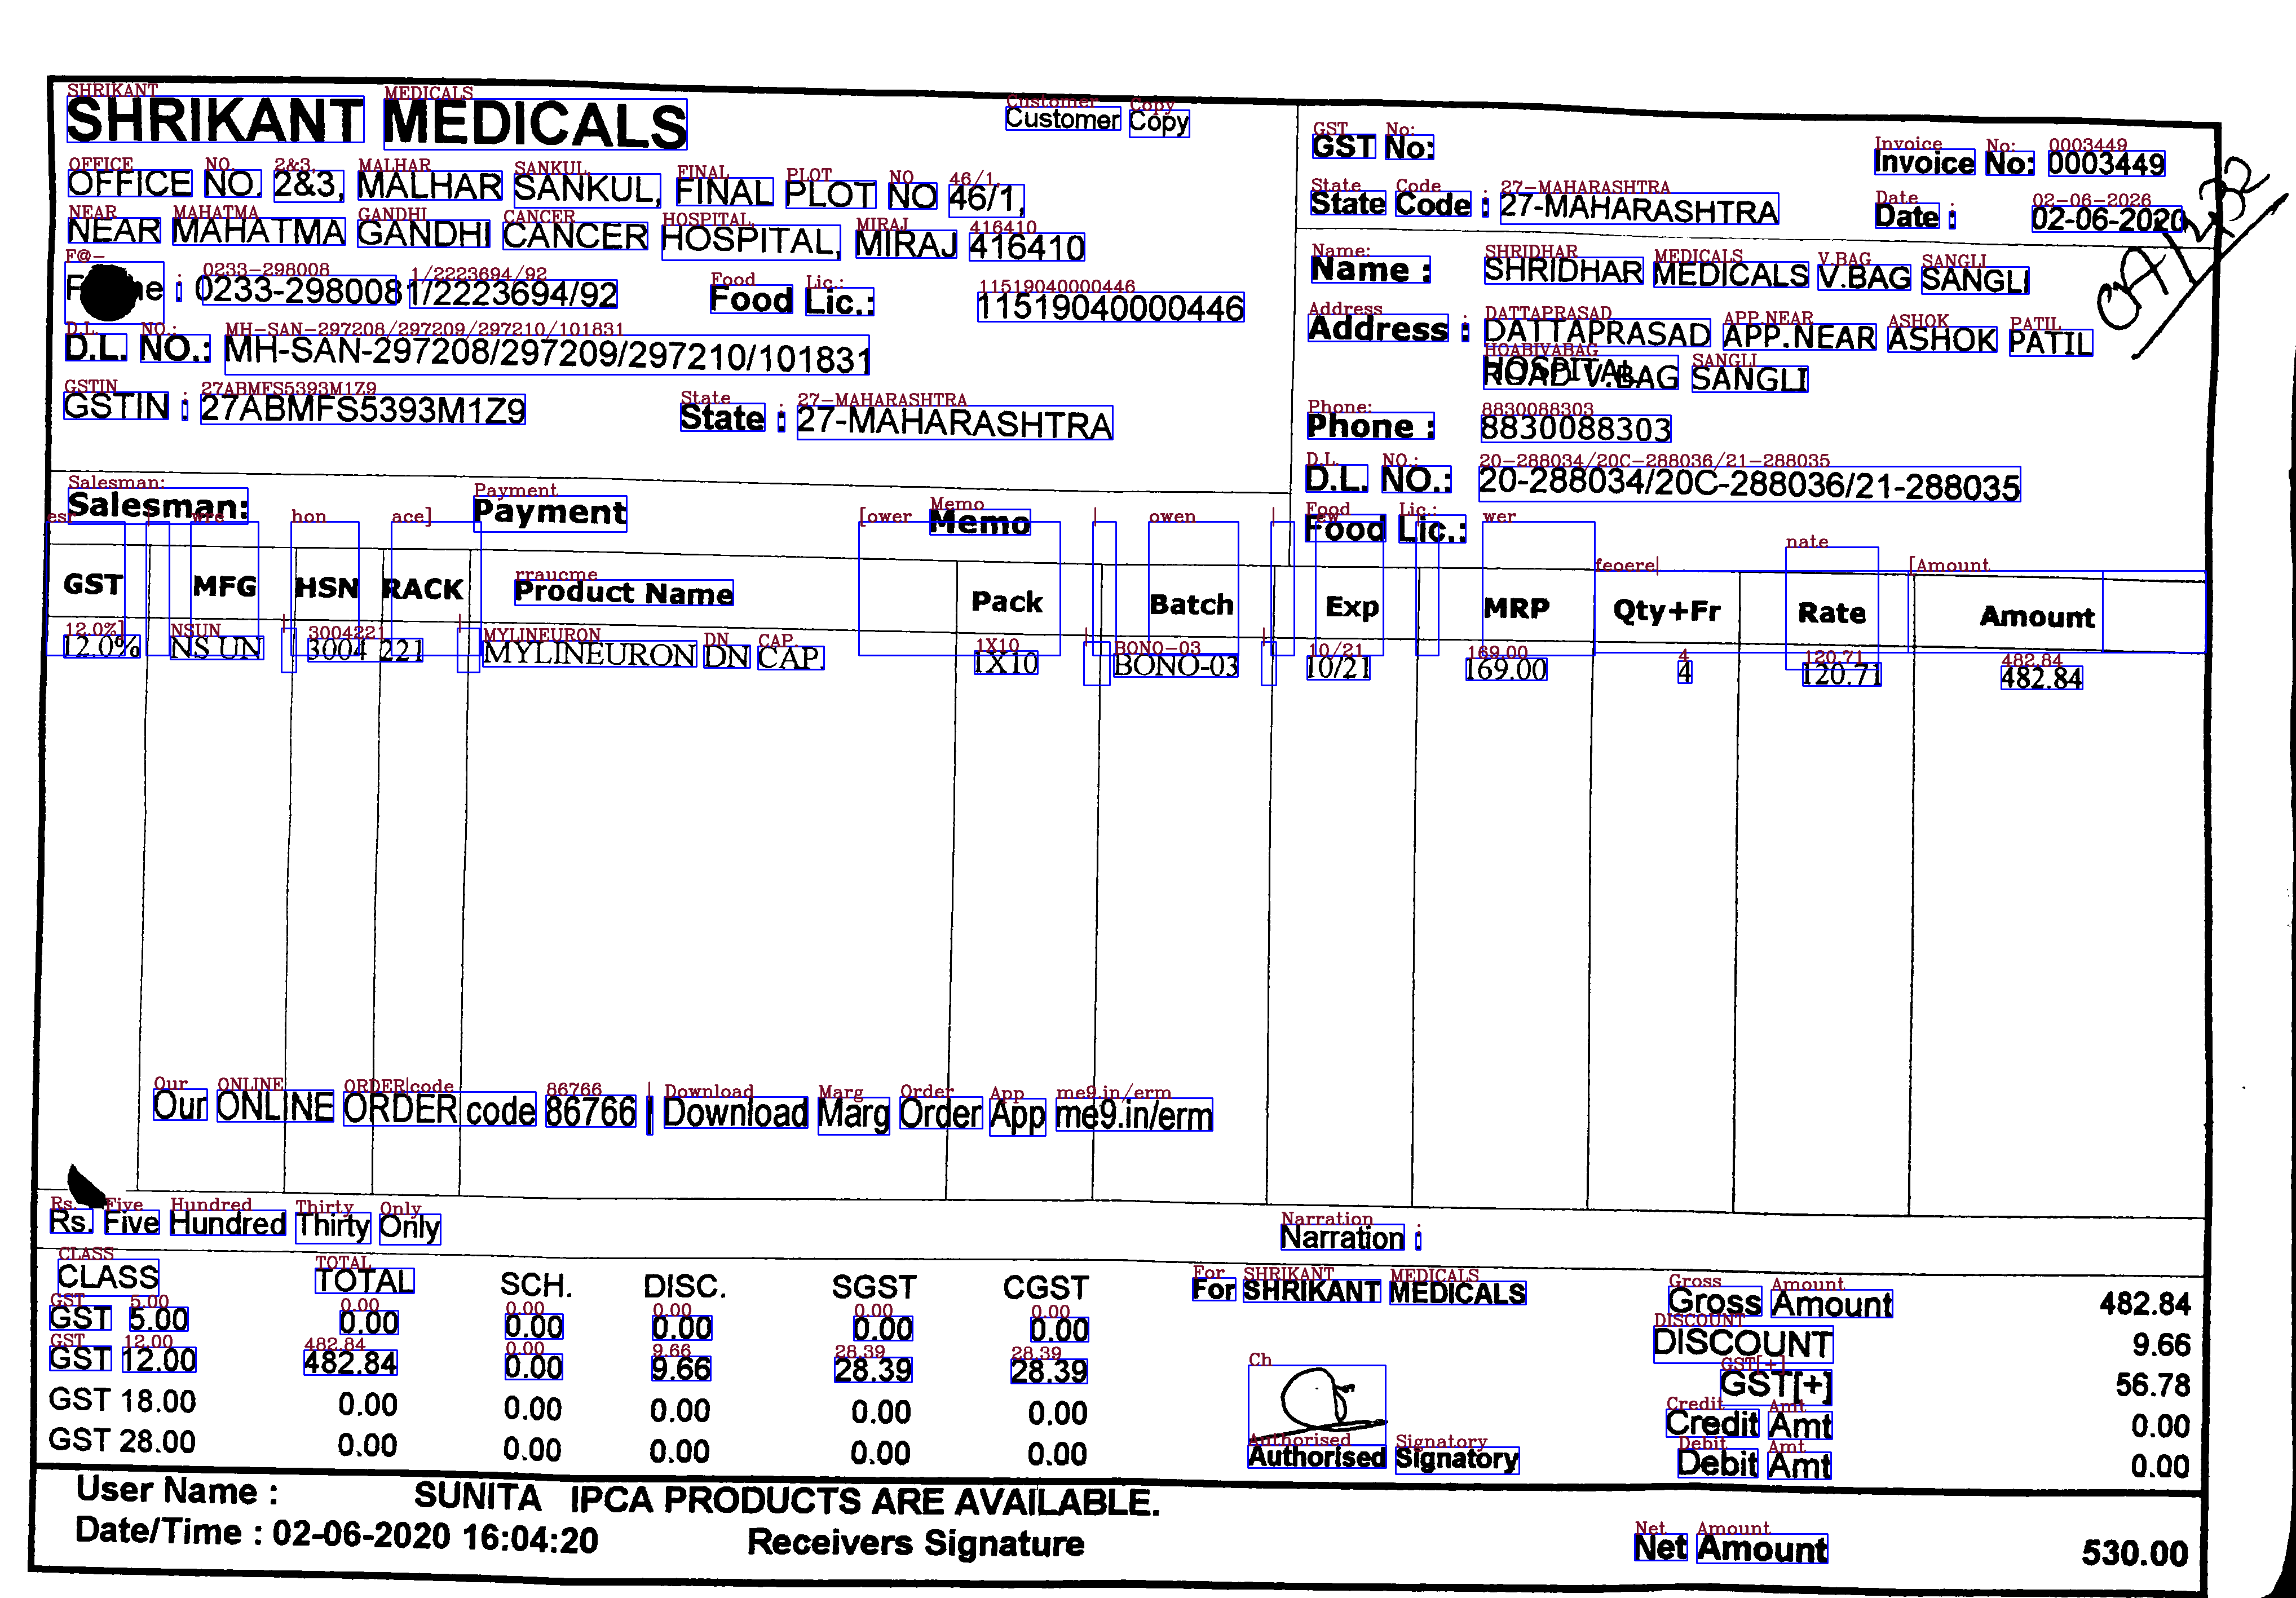

In [11]:
img2=cv2.imread("inv10_binary.png")
boxes1=pytesseract.image_to_data(img2)         #It stores info about image like page number,line number,par number,level
for x1,b1 in enumerate(boxes1.splitlines()):   # X1 is counter variable
    if x1!=0:
        b1=b1.split()
        if len(b1)==12:
            x1,y1,w1,h1=int(b1[6]),int (b1[7]),int (b1[8]),int (b1[9])
            cv2.rectangle(img2,(x1,y1),(w1+x1,h1+y1),(0,0,255),2)
            cv2.putText(img2,b1[11],(x1,y1),cv2.FONT_HERSHEY_COMPLEX,1,(117,13,40),2)
image_with_clusters = Image.fromarray(img2)
image_with_clusters